# 1A. KNN Implementation Using KNeighborsClassifier

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the dataset
breast_cancer_data = load_breast_cancer()
X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
y = pd.Series(breast_cancer_data.target, name='target')
# Handling duplicates
X.drop_duplicates(inplace=True)
y = y[X.index]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the preprocessed data to a CSV file
preprocessed_data = pd.DataFrame(X_scaled, columns=breast_cancer_data.feature_names)
preprocessed_data['target'] = y
preprocessed_data.to_csv('preprocessed_breast_cancer_data.csv', index=False)

# Load the preprocessed data from the CSV file
preprocessed_data = pd.read_csv('preprocessed_breast_cancer_data.csv')
X = preprocessed_data.drop(columns=['target'])
y = preprocessed_data['target']

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Splitting data into training & testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
knn_classifier.fit(X_train, y_train)

# Predict the model
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
f1_knn = f1_score(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)

print("\nKNN Model Evaluation")
print(f"F1 Score: {f1_knn:.2f}")
print(f"Accuracy: {accuracy_knn:.2f}")



KNN Model Evaluation
F1 Score: 0.98
Accuracy: 0.97


# 1B. KNN Implementation Using scipy KDTree

In [2]:
from scipy.spatial import KDTree

# Load the pre-processed data from the CSV file
preprocessed_data = pd.read_csv('preprocessed_breast_cancer_data.csv')
X = preprocessed_data.drop(columns=['target'])
y = preprocessed_data['target']

# Splitting data into training & testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build a KDTree using the training dataset
kd_tree = KDTree(X_train)

# Query the KDTree for k-nearest neighbors (k=5)
k = 5
distances, indices = kd_tree.query(X_test, k=k)

# Aggregate predictions using majority voting
y_pred = []
for index_list in indices:
    neighbor_labels = y_train.iloc[index_list]
    # Use mode to determine the most common class among neighbors
    y_pred.append(neighbor_labels.mode()[0])

# Evaluate the model on the test dataset
f1_scipy = f1_score(y_test, y_pred)
accuracy_scipy = accuracy_score(y_test, y_pred)

print("\nScipy KDTree KNN Results")
print(f"F1 Score: {f1_scipy:.2f}")
print(f"Accuracy: {accuracy_scipy:.2f}")



Scipy KDTree KNN Results
F1 Score: 0.98
Accuracy: 0.97


# 2A. Implementation using Scikit-learn DecisionTreeClassifier

Decision Tree Classifier Model Evaluation:
F1 Score: 0.93
Accuracy: 0.92


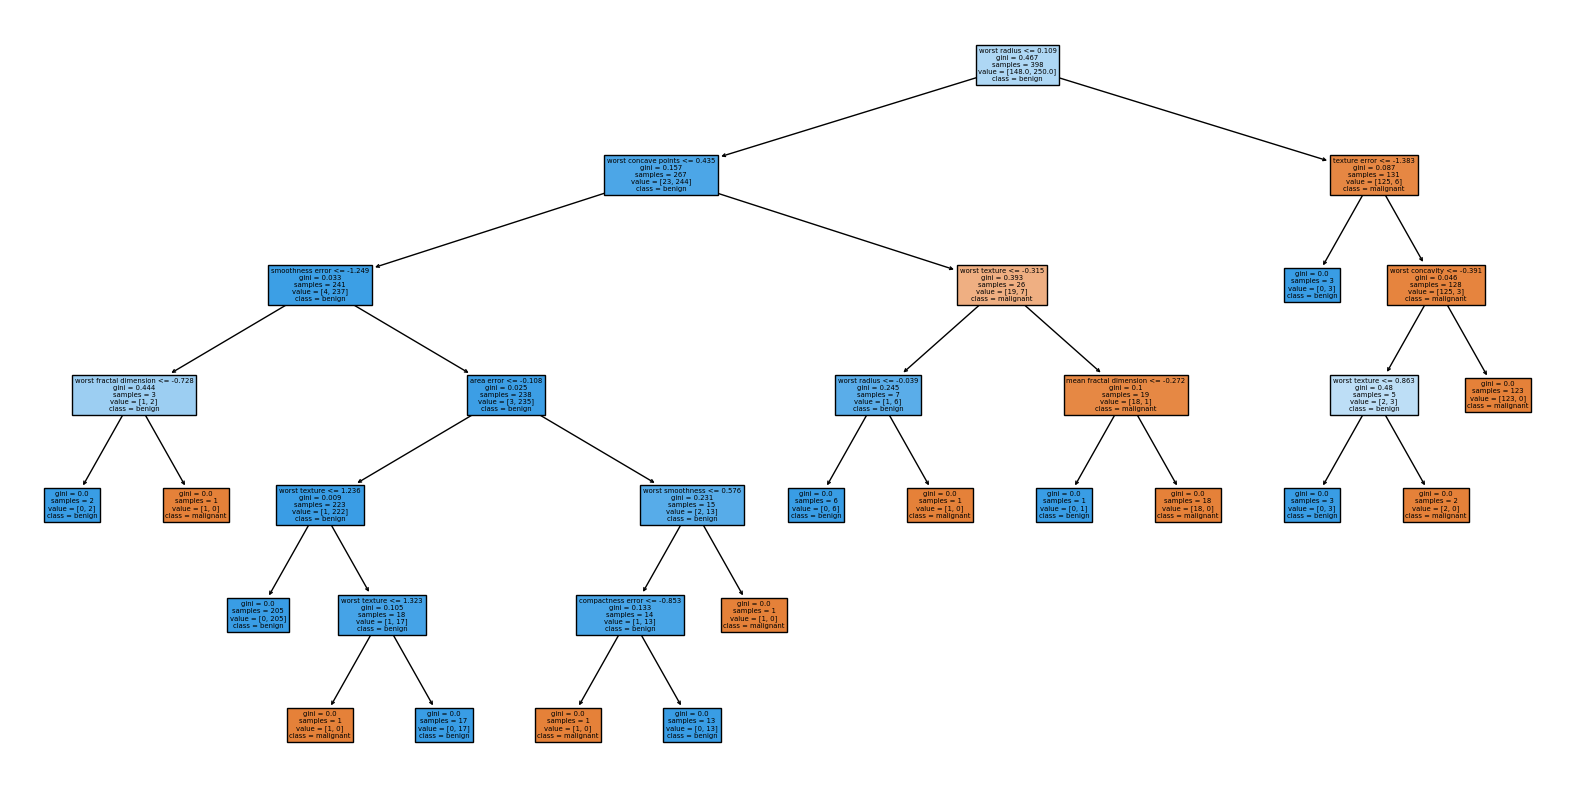

In [7]:

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load dataset
breast_cancer_data = load_breast_cancer()
X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
y = pd.Series(breast_cancer_data.target, name='target')

# Identify data types
data_types = X.dtypes

# Summary of each variable
summary_statistics = X.describe()

# Handling duplicates
X.drop_duplicates(inplace=True)
y = y[X.index]  # Update y to match the index of X after dropping duplicates

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data splitting into training & teasiing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Save pre-processed data to CSV
preprocessed_data = pd.concat([X, y], axis=1)
preprocessed_data.to_csv('DTpreprocessed_breast_cancer_data.csv', index=False)

# Load pre-processed data
preprocessed_data = pd.read_csv('DTpreprocessed_breast_cancer_data.csv')
X = preprocessed_data.drop(columns=['target'])
y = preprocessed_data['target']

# Initialize Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

decision_tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
f1_score_dt = f1_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred)

print("Decision Tree Classifier Model Evaluation:")
print(f"F1 Score: {f1_score_dt:.2f}")
print(f"Accuracy: {accuracy_dt:.2f}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, filled=True, feature_names=breast_cancer_data.feature_names, class_names=breast_cancer_data.target_names)
plt.show()


# 2B. Implementation using XGBOOST DecisionTree

In [5]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load pre-processed data
preprocessed_data = pd.read_csv('DTpreprocessed_breast_cancer_data.csv')
X = preprocessed_data.drop(columns=['target'])
y = preprocessed_data['target']

# Data splitted into training & testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
f1_score_xgb = f1_score(y_test, y_pred)
accuracy_xgb = accuracy_score(y_test, y_pred)

print("XGBoost Classifier Model Evaluation:")
print(f"F1 Score: {f1_score_xgb:.2f}")
print(f"Accuracy: {accuracy_xgb:.2f}")


XGBoost Classifier Model Evaluation:
F1 Score: 0.97
Accuracy: 0.96
